### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score, accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import chi2, SelectKBest
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     

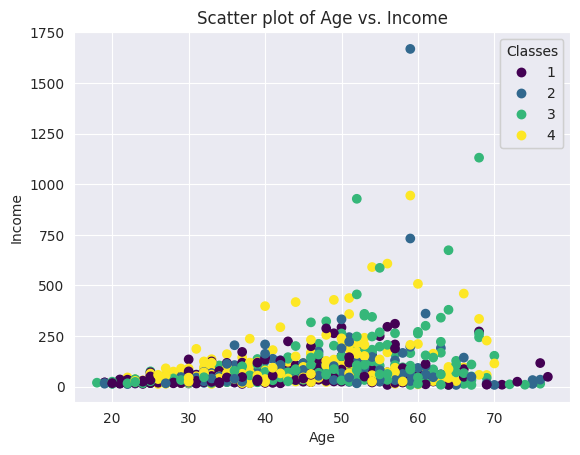

In [2]:
#file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
file_path = 'teleCust1000t.csv'
df = pd.read_csv(file_path)
headers = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
df.columns = headers
df['custcat'].value_counts()
print(df.info())
#df.hist()
print(df.head())

#sns.pairplot(df, hue='custcat')


#Plot
scatter = plt.scatter(df['age'], df['income'], c=df['custcat'], cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(), title = 'Classes')
plt.gca().add_artist(legend1)

# Labels and title
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter plot of Age vs. Income')


plt.show()

### Feature Set
##### To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array
### Normalize Data
* Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points

*** Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on

In [3]:
X_df = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']]
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[0:5]

Y_df = df['custcat']
Y = df['custcat'].values
Y[0:5]




array([1, 4, 3, 1, 3])

### Feature Selection
#### Use CHI^2 as a feature set method
* #### accuracy score --> Number of Correct Prediction / Total Prediction
* #### Classification Report : 
    *   Precision = (True Positive / True Positive + False Positive)
        *   The ratio of true positive predictions to the total predicted positives. It indicates how many of the predicted positives are actually positive.
    
    * Recall(Sensitivity or True Positive Rate) = (True Positive / True Positive + False Negative)
        * The ratio of true positive predictions to the total actual positives. It indicates how many of the actual positives are captured by the model.
    
    * F1Score = 2* (Precision * Recall) / (Precision + Recall)
        * The harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.

* #### Support : The number of actual occurrences of each class in the test set.



In [6]:
# Split the data into train and test
x1_train, x1_test, y1_train, y1_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=1)

# Apply Chi^2 test
f_score, p_values = chi2(x1_train, y1_train)

p_values_series = pd.Series(p_values, index=X_df.columns)
p_values_series.sort_values(ascending=False, inplace=True)
#print(p_values_series)

#Select significant Features based on the threshold
significant_features = p_values_series[p_values_series < 0.05].index
print(f'Significant Features based on P-values: {significant_features}')

# prepare training and testing set based on  significant features
x1_train_selected = x1_train[significant_features]
x1_test_selected = x1_test[significant_features]

# Train a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5).fit(x1_train_selected,y1_train)

# Predict and Evaluate
y_pred = knn.predict(x1_test_selected)

# Evaluate the Performance
accuracy = accuracy_score(y1_test, y_pred)
print(f'accuracy with selected fetures: {accuracy:.2f}')
print("Classification Report:\n", classification_report(y1_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y1_test, y_pred))



Significant Features based on P-values: Index(['reside', 'age', 'ed', 'address', 'employ', 'tenure', 'income'], dtype='object')
accuracy with selected fetures: 0.34
Classification Report:
               precision    recall  f1-score   support

           1       0.42      0.48      0.45        65
           2       0.21      0.27      0.24        37
           3       0.35      0.31      0.33        55
           4       0.33      0.23      0.27        43

    accuracy                           0.34       200
   macro avg       0.33      0.32      0.32       200
weighted avg       0.34      0.34      0.34       200

Confusion Matrix: 
 [[31 13 13  8]
 [11 10 10  6]
 [17 15 17  6]
 [15  9  9 10]]


#### Matrix Fusion Interpretation
Class 0:

True Positives (TP): 31
Misclassified as Class 1: 13
Misclassified as Class 2: 13
Misclassified as Class 3: 8
Class 1:

True Positives (TP): 10
Misclassified as Class 0: 11
Misclassified as Class 2: 10
Misclassified as Class 3: 6
Class 2:

True Positives (TP): 17
Misclassified as Class 0: 17
Misclassified as Class 1: 15
Misclassified as Class 3: 6
Class 3:

True Positives (TP): 10
Misclassified as Class 0: 15
Misclassified as Class 1: 9
Misclassified as Class 2: 9

#### Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(f'Train Set= {x_train.shape} , {y_train.shape}')
print(f'Test Set= {x_test.shape}, {y_test.shape}')

#### Considerations for Using KNN
* Data Standardization
* Choosing K by using Cross Validation

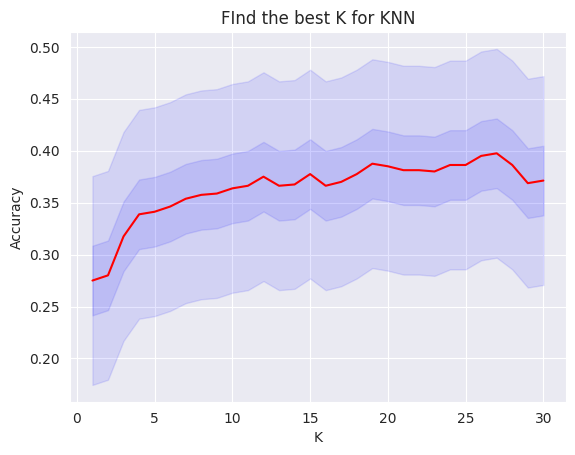

In [13]:
scaler = StandardScaler()
x1_train_selected = scaler.fit_transform(x1_train_selected)
x1_test_selected = scaler.transform(x1_test_selected)

k_range = range(1,31)
k_score = []
std=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x1_train_selected, y1_train, cv=5, scoring='accuracy', error_score= 'raise')
    k_score.append(scores.mean())
    std.append(np.std(y_pred == y1_test)/ np.sqrt(y_pred.shape[0]))

k_score_array = np.array(k_score)    
std_array = np.array(std)
# Plotting to find the best K
plt.plot(k_range, k_score, color='r')
plt.fill_between(k_range,k_score_array - 1 * std_array, k_score_array + 1 * std_array, alpha=0.10, color='b')
plt.fill_between(k_range,k_score_array - 3 * std_array, k_score_array + 3 * std_array, alpha=0.10, color='b')
plt.title('FInd the best K for KNN')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

#### Configure KNN with The Value of K with maximum accuracy

In [17]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(x1_train_selected, y1_train)
y_pred = knn.predict(x1_test_selected)

print(f'Train Set accuracy based on k=26 : {accuracy_score(y1_train,knn.predict(x1_train_selected))}')
print(f'Test set accuracy based on k=26 : {accuracy_score(y1_test, y_pred)}')

Train Set accuracy based on k=27 : 0.4525
Test set accuracy based on k=27 : 0.395


## Conclusion
* Using feature Selection and k-fold cross validation to obtain the best value for the number of neighbors cause to increase the accuracy of test dataset and reduce the probability of overfitting

### KNN Classification without feature selection and with original dataset
* It contains: 
    * Model Evaluation
    * Plot K (number of neighbores) against accuracy

Train Set Accuracy= 0.5475
Test Set accuracy= 0.32


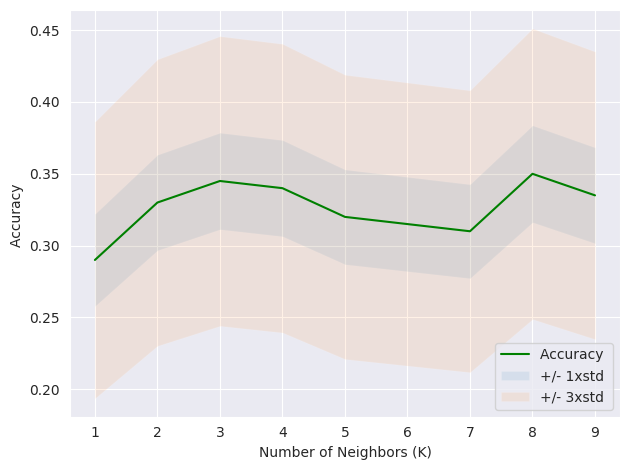

In [11]:
X = StandardScaler().fit_transform(X.astype(float)).round(3)

K = 5
neigh = KNeighborsClassifier(n_neighbors=K).fit(x_train, y_train)
neigh
yhat = neigh.predict(x_test)
yhat[0:5]

# Accuracy Classification Score
print(f'Train Set Accuracy= {accuracy_score(y_train , neigh.predict(x_train))}')
print(f'Test Set accuracy= {accuracy_score(y_test, yhat)}')


ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/ np.sqrt(yhat.shape[0])


plt.plot(range(1,ks),mean_acc, color = 'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')

plt.tight_layout()
plt.show()




#### Sample Code for learning to plot accuracy and std against K (number of neighbors)

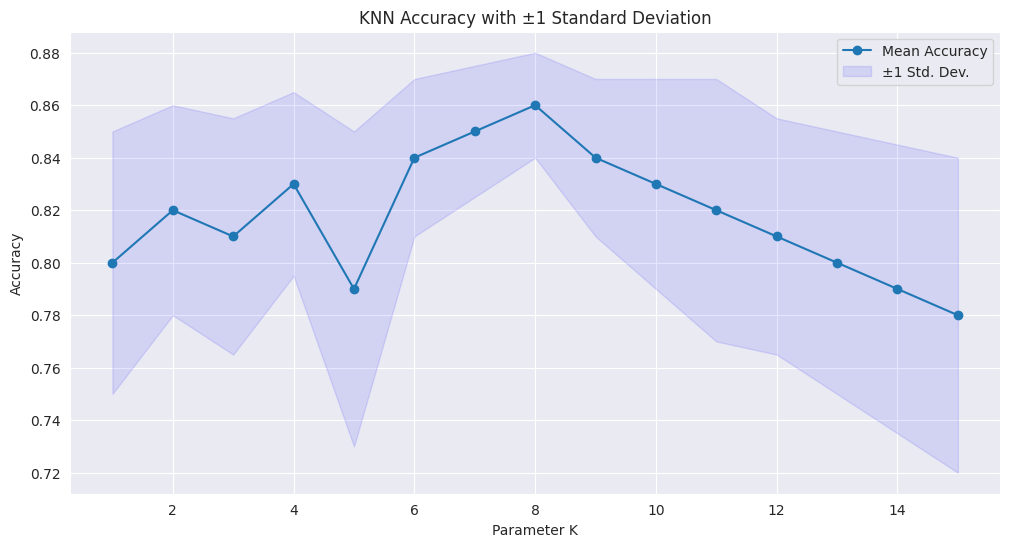

In [6]:


# Correcting the sample data for K values to match the length
Ks = 15
x = range(1, Ks + 1)
mean_acc = np.array([0.8, 0.82, 0.81, 0.83, 0.79, 0.84, 0.85, 0.86, 0.84, 0.83, 0.82, 0.81, 0.80, 0.79, 0.78])
std_acc = np.array([0.05, 0.04, 0.045, 0.035, 0.06, 0.03, 0.025, 0.02, 0.03, 0.04, 0.05, 0.045, 0.05, 0.055, 0.06])

# Plotting the mean accuracy with fill_between for standard deviation
plt.figure(figsize=(12, 6))
plt.plot(x, mean_acc, marker='o', label='Mean Accuracy')
plt.fill_between(x, mean_acc - std_acc, mean_acc + std_acc, color='blue', alpha=0.1, label='±1 Std. Dev.')

# Adding labels and legend
plt.xlabel('Parameter K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy with ±1 Standard Deviation')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

### Interpreting the Plot:

1. **Mean Accuracy Line**:
   - The solid line with markers shows the mean accuracy for each value of \( K \).

2. **Shaded Area (±1 Standard Deviation)**:
   - The blue shaded area around the mean accuracy line represents ±1 standard deviation. This area indicates the variability or uncertainty around the mean accuracy for each \( K \).

### Key Observations:

1. **Peak Mean Accuracy**:
   - The highest mean accuracy is observed at \( K = 8 \), where the accuracy reaches 0.86. This suggests \( K = 8 \) as a potential candidate for the best \( K \).

2. **Stability of Accuracy**:
   - At \( K = 8 \), the shaded area (±1 standard deviation) is relatively narrow, indicating high stability and low variability in accuracy. This suggests that the model's performance is consistently good around this \( K \).

3. **Comparison with Other \( K \) Values**:
   - Although other \( K \) values also show high mean accuracy, some have wider shaded areas. For instance, \( K = 4 \) and \( K = 5 \) have high mean accuracy but also higher variability, which might indicate less consistent performance.

### Conclusion:

- Based on the plot, \( K = 8 \) not only provides the highest mean accuracy but also demonstrates low variability, making it a strong candidate for the optimal \( K \) value for the KNN algorithm.
- The `fill_between` shading helps to visualize not just the accuracy but also the reliability of that accuracy, aiding in a more informed decision.

This approach ensures that you are not just selecting the \( K \) with the highest mean accuracy, but also considering the stability and consistency of the model's performance.